# Rules for web scraping [must know]
- Check the Terms and Conditions of the website before we scrape it. The Legal Use of Data section will have the information about data that we all can use.
- Keep the pace low. If we request for data from the website too aggressively with our bot or our program, it might be considered as spamming. Add wait time in between to make the program behave like a human.
- Use public content only.

Ensure you have checked out the robots.txt of the website to be scraped!

# Step for web scraping [must know]
1. check out the robots.txt
2. send http requests and get the webpage using ``requests`` 
3. handle the webpage using ``BeautifulSoup``
4. store the processed data
5. repeat the process of 2-4 if necessary


In [215]:
!pip install bs4

In [1]:
## the libs for web scraping
import requests
#import BautifulSoup library to pull data out of HTML and XML files
from bs4 import BeautifulSoup

## 1. check out robots.txt

In [2]:
#specify the url we want to scrape from
link_robots = 'https://facultyprofiles.hkust.edu.hk/robots.txt'
#convert the web page to text
link_text = requests.get(link_robots).text
print(link_text)

User-agent: *
Disallow: /admin/
Disallow: /api/
Disallow: /cache/
Disallow: /edm/
Disallow: /en/
Disallow: /errorPages/
Disallow: /search/
Disallow: /profiles/*.php
Disallow: /CAS/

Sitemap: https://facultyprofiles.hkust.edu.hk/sitemap.xml


## 2. scraped the webpage

In [3]:
link = 'https://facultyprofiles.hkust.edu.hk/facultylisting.php'
link_text = requests.get(link).text
soup = BeautifulSoup(link_text, 'html')

In [219]:
print(link_text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## 3. process the webpage with BeautifulSoup


In [4]:
#to convert Link_text into a BeautifulSoup Object
soup = BeautifulSoup(link_text, 'html')

In [221]:
# print out the webpage
print(soup)

<!DOCTYPE html>
<html lang="en">
<head>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="Faculty Profiles serves as a directory for the university community and the external stakeholders to better understand our faculty." lang="en" name="description"/>
<meta content="「教授簡錄」協助大學內各部門及校外持份者更多了解我們的教授。" lang="zh-Hans" name="description"/>
<meta content="「教授简录」协助大学内各部门及校外持份者更多了解我们的教授。" lang="zh-Hant" name="description"/>
<meta content="HKUST UST faculty staff scholar profiles database, ust faculty, hkust faculty, ust staff, the hong kong university of science and technology" name="keywords"/>
<meta content="The Hong Kong University of Science and Technology" property="og:description"/>
<meta content="./images/bg-social-media.jpg" property="og:image"/>
<base href="https://facultyprofiles.hkust.edu.hk/"/>
<link href="https://fonts.googl

## 4. find all the links

In [5]:
import re
# Find all the links
scholar_list = []
for scholar in soup.select('[data-sort-cse]'):
    for container in scholar.select('.btn.btn-outline-dark.profile-link'):
        link = 'https://facultyprofiles.hkust.edu.hk/' + container.get('href')
        link_name = link.split('=')[-1]
        name = link_name.split('-')[:-1]
        whole_name = []
        whole_name.append(name[-1])
        for i in range(len(name)-1):
            #print(name[i])
            whole_name.append(name[i])
        #print(whole_name)
        scholar_list.append([whole_name, link])
scholar_list

[[['guo', 'yike'],
  'https://facultyprofiles.hkust.edu.hk/profiles.php?profile=yike-guo-yikeguo'],
 [['pong', 'ting', 'chuen'],
  'https://facultyprofiles.hkust.edu.hk/profiles.php?profile=ting-chuen-pong-tcpong'],
 [['cheng', 'tim', 'kwangting'],
  'https://facultyprofiles.hkust.edu.hk/profiles.php?profile=tim-kwangting-cheng-timcheng'],
 [['qu', 'huamin'],
  'https://facultyprofiles.hkust.edu.hk/profiles.php?profile=huamin-qu-huamin'],
 [['zhou', 'xiaofang'],
  'https://facultyprofiles.hkust.edu.hk/profiles.php?profile=xiaofang-zhou-zxf'],
 [['wong', 'raymond', 'chi', 'wing'],
  'https://facultyprofiles.hkust.edu.hk/profiles.php?profile=raymond-chi-wing-wong-raywong'],
 [['zhang', 'qian'],
  'https://facultyprofiles.hkust.edu.hk/profiles.php?profile=qian-zhang-qianzh'],
 [['chen', 'lei'],
  'https://facultyprofiles.hkust.edu.hk/profiles.php?profile=lei-chen-leichen'],
 [['li', 'bo'],
  'https://facultyprofiles.hkust.edu.hk/profiles.php?profile=bo-li-bli'],
 [['yang', 'qiang'],
  'ht

## 5. get new data based on the scraped information

find collaborators of the the first scholor in lst_scholar and number of shared research output

In [6]:
final_list = []
for i in range(len(scholar_list)):
    edge_list = []
    
    #print(scholar_list[i][1])
    link = scholar_list[i][1] + '#publications'
    individual_page = requests.get(link).text
    soup_individual = BeautifulSoup(individual_page, 'html')
    
    coauthor_list = []
    for year in soup_individual.select('.pubBlock'):
        #print(scholar_list[0][0])
        for paper in year.select('br+span'):
            if (scholar_list[i][0][0] in paper.text.lower()):
                #print(paper.text.split(';'))
                coauthor_list.append(paper.text.split(';')) 
    #print(coauthor_list)
    
    punc_re = r'[^\w]'
    other = False
    
    surname = scholar_list[i][0][0]
    all_short = surname
    last_short = surname
    en_with_short = surname + scholar_list[i][0][1]
    full_x_en = surname
    full = surname
    
    for j in range(1, len(scholar_list[i][0])):
        all_short += scholar_list[i][0][j][0]
        if len(scholar_list[i][0]) < 3:
            last_short = ''
            en_with_short = ''
            full_x_en = ''
        else:
            if j > 1:
                last_short += scholar_list[i][0][j][0]
                en_with_short += scholar_list[i][0][j][0]
                full_x_en += scholar_list[i][0][j]
        full += scholar_list[i][0][j]
    #print(full, all_short, last_short, en_with_short, full_x_en)
    
    for paper_coauthor in coauthor_list:
        for coauthor in paper_coauthor:
            edge = []
            cleaned_coauthor = re.sub(punc_re, '', coauthor).lower()
            #print(cleaned_author)
            #for items in scholar_list[i][0]:
                #print(items)
            if cleaned_coauthor != full and cleaned_coauthor != all_short and cleaned_coauthor != last_short and cleaned_coauthor != en_with_short and cleaned_coauthor != full_x_en:
                other = True
            if other == True:
                edge.append(coauthor.strip().lower())
                edge.append(scholar_list[i][0])
                other = False
            #print(edge)
            edge_list.append(edge)
    edge_list = list(filter(None, edge_list))
    for edge in edge_list:
        #print(print(edge, edge_list.count(edge)))
        temp = [edge, edge_list.count(edge)]
        reverse_temp = [[edge[1], edge[0]], edge_list.count(edge)]
        if (temp not in final_list) and (reverse_temp not in final_list) and (edge_list.count(edge) > 5):
            final_list.append(temp)

from operator import itemgetter

final_list.sort(key=itemgetter(1), reverse=True)
final_list

[[['zhu, wenwu', ['zhang', 'qian']], 100],
 [['zheng, kai', ['zhou', 'xiaofang']], 79],
 [['heng, pheng-ann', ['chen', 'hao']], 71],
 [['wang, wei', ['zhang', 'qian']], 66],
 [['yang, xin', ['cheng', 'tim', 'kwangting']], 61],
 [['zhang, jin', ['zhang', 'qian']], 61],
 [['li, baochun', ['li', 'bo']], 60],
 [['shen, heng tao', ['zhou', 'xiaofang']], 59],
 [['liu, jiangchuan', ['li', 'bo']], 55],
 [['ng, wilfred', ['ng', 'wilfred', 'siu', 'hung']], 53],
 [['hui, pan', ['braud', 'tristan', 'camille']], 53],
 [['hua, wen', ['zhou', 'xiaofang']], 52],
 [['lian, xiang', ['chen', 'lei']], 52],
 [['papadias, dimitrios', ['papadias', 'dimitris']], 50],
 [['wang, lujia', ['liu', 'ming']], 50],
 [['wang, lichung', ['cheng', 'tim', 'kwangting']], 49],
 [['krstic, angela', ['cheng', 'tim', 'kwangting']], 49],
 [['chen, yanjiao', ['zhang', 'qian']], 49],
 [['tong, yongxin', ['chen', 'lei']], 49],
 [['dou, qi', ['chen', 'hao']], 49],
 [['yin, hongzhi', ['zhou', 'xiaofang']], 47],
 [['sun, yuxiang', [

In [7]:
final_list.remove([['ng, wilfred', ['ng', 'wilfred', 'siu', 'hung']], 53])
final_list.remove([['papadias, dimitrios', ['papadias', 'dimitris']], 50])
final_list.remove([['ng, w.', ['ng', 'wilfred', 'siu', 'hung']], 37])
final_list.remove([['sander, pedro v.', ['sander', 'pedro']], 31])
final_list.remove([['mak, brian', ['mak', 'brian', 'kan', 'wing']], 24])
final_list.remove([['papadopoulos, dimitrios', ['papadopoulos', 'dimitris']], 23])
final_list.remove([['kwok, james', ['kwok', 'james', 'tin', 'yau']], 16])
final_list.remove([['sander, pedro vieira', ['sander', 'pedro']], 20])
final_list.remove([['golin, mordecai', ['golin', 'mordecai', 'jay']], 19])
final_list.remove([['mak, b.', ['mak', 'brian', 'kan', 'wing']], 16])
final_list.remove([['zhang, charles', ['zhang', 'charles', 'chuan']], 12])
final_list.remove([['cheng, kwang-ting tim', ['cheng', 'tim', 'kwangting']], 11])
final_list.remove([['rossiter, david', ['rossiter', 'david', 'paul']], 11])
final_list.remove([['leung, kenneth wai ting', ['leung', 'wai', 'ting']], 10])
final_list.remove([['chan, shueng-han gary', ['chan', 'gary', 'shueng', 'han']], 8])
final_list.remove([['golin, m.', ['golin', 'mordecai', 'jay']], 8])
final_list.remove([['lam, ngok', ['lam', 'alex']], 8])
final_list.remove([['horner, andrew', ['horner', 'andrew', 'brian']], 7])

In [8]:
final_list

[[['zhu, wenwu', ['zhang', 'qian']], 100],
 [['zheng, kai', ['zhou', 'xiaofang']], 79],
 [['heng, pheng-ann', ['chen', 'hao']], 71],
 [['wang, wei', ['zhang', 'qian']], 66],
 [['yang, xin', ['cheng', 'tim', 'kwangting']], 61],
 [['zhang, jin', ['zhang', 'qian']], 61],
 [['li, baochun', ['li', 'bo']], 60],
 [['shen, heng tao', ['zhou', 'xiaofang']], 59],
 [['liu, jiangchuan', ['li', 'bo']], 55],
 [['hui, pan', ['braud', 'tristan', 'camille']], 53],
 [['hua, wen', ['zhou', 'xiaofang']], 52],
 [['lian, xiang', ['chen', 'lei']], 52],
 [['wang, lujia', ['liu', 'ming']], 50],
 [['wang, lichung', ['cheng', 'tim', 'kwangting']], 49],
 [['krstic, angela', ['cheng', 'tim', 'kwangting']], 49],
 [['chen, yanjiao', ['zhang', 'qian']], 49],
 [['tong, yongxin', ['chen', 'lei']], 49],
 [['dou, qi', ['chen', 'hao']], 49],
 [['yin, hongzhi', ['zhou', 'xiaofang']], 47],
 [['sun, yuxiang', ['liu', 'ming']], 46],
 [['xu, chang', ['cheung', 'shing', 'chi']], 44],
 [['fang, tian', ['quan', 'long']], 43],
 [[

In [9]:
len(final_list)

1044

6. Create valid edge_list

In [30]:
edge_list = []

for i in range(len(final_list)):
    scholar = final_list[i][0][1][0] + ', '
    for j in range(1, len(final_list[i][0][1])):
        #print(final_list[i][0][1][j]) 
        scholar += final_list[i][0][1][j] + ' '
    edge_list.append([final_list[i][0][0], scholar, final_list[i][1]])

edge_list

[['zhu, wenwu', 'zhang, qian ', 100],
 ['zheng, kai', 'zhou, xiaofang ', 79],
 ['heng, pheng-ann', 'chen, hao ', 71],
 ['wang, wei', 'zhang, qian ', 66],
 ['yang, xin', 'cheng, tim kwangting ', 61],
 ['zhang, jin', 'zhang, qian ', 61],
 ['li, baochun', 'li, bo ', 60],
 ['shen, heng tao', 'zhou, xiaofang ', 59],
 ['liu, jiangchuan', 'li, bo ', 55],
 ['hui, pan', 'braud, tristan camille ', 53],
 ['hua, wen', 'zhou, xiaofang ', 52],
 ['lian, xiang', 'chen, lei ', 52],
 ['wang, lujia', 'liu, ming ', 50],
 ['wang, lichung', 'cheng, tim kwangting ', 49],
 ['krstic, angela', 'cheng, tim kwangting ', 49],
 ['chen, yanjiao', 'zhang, qian ', 49],
 ['tong, yongxin', 'chen, lei ', 49],
 ['dou, qi', 'chen, hao ', 49],
 ['yin, hongzhi', 'zhou, xiaofang ', 47],
 ['sun, yuxiang', 'liu, ming ', 46],
 ['xu, chang', 'cheung, shing chi ', 44],
 ['fang, tian', 'quan, long ', 43],
 ['chen, zheng', 'yang, qiang ', 40],
 ['ayers, lydia', 'horner, andrew brian ', 40],
 ['fu, hongbo', 'tai, chiew lan ', 40],
 [

7. Construct graph

In [31]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_weighted_edges_from(edge_list)
pos = nx.spring_layout(G)

Spring Layout

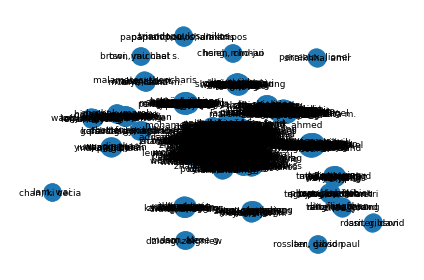

In [374]:
#spring_layout
pos = nx.spring_layout(G)

#draw nodes
nx.draw_networkx_nodes(G, pos)
#draw edges
nx.draw_networkx_edges(G, pos, width=1)

# node labels
nx.draw_networkx_labels(G, pos, font_size=9, font_family="sans-serif")

# edge weight labels
#edge_labels = nx.get_edge_attributes(G, "weight")
#nx.draw_networkx_edge_labels(G, pos, edge_labels)
#plt.figure(figsize=(40, 40))
ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
#lt.show()

In [33]:
G.number_of_nodes()

1015

8. visualize the graph

In [34]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] >= 30]
emiddle = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] >= 10 and d["weight"] < 30)]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] < 10]

In [378]:
def draw_network(G, dict_centrality, pos):
    cc = dict_centrality
    if (max(cc.values()) < 1):
      #print(max(cc.values()))
      adapted_cc_values = [ v **2 * 1000000 for v in cc.values()]
    else:
        ## for harmonic centrality
        adapted_cc_values = [ v * 10 for v in cc.values()]
    nx.draw(G, nodelist=cc.keys(), node_size=adapted_cc_values, node_color="white", edgecolors='black', pos=pos, alpha=0.5)

8.1 nodes size proportionate to degree of centrality

{'zhang, qian ': Text(0.014780276454985142, 0.00803156103938818, 'zhang, qian '),
 'zhou, xiaofang ': Text(0.022358916699886322, 0.059755969792604446, 'zhou, xiaofang '),
 'cheng, tim kwangting ': Text(0.2592395544052124, 0.23436440527439117, 'cheng, tim kwangting '),
 'li, bo ': Text(0.04806006699800491, -0.018695920705795288, 'li, bo '),
 'chen, lei ': Text(-0.0833565890789032, 0.04104967415332794, 'chen, lei '),
 'yang, qiang ': Text(-0.09878216683864594, -0.06495032459497452, 'yang, qiang '),
 'guo, yike ': Text(0.4117506742477417, -0.050695765763521194, 'guo, yike ')}

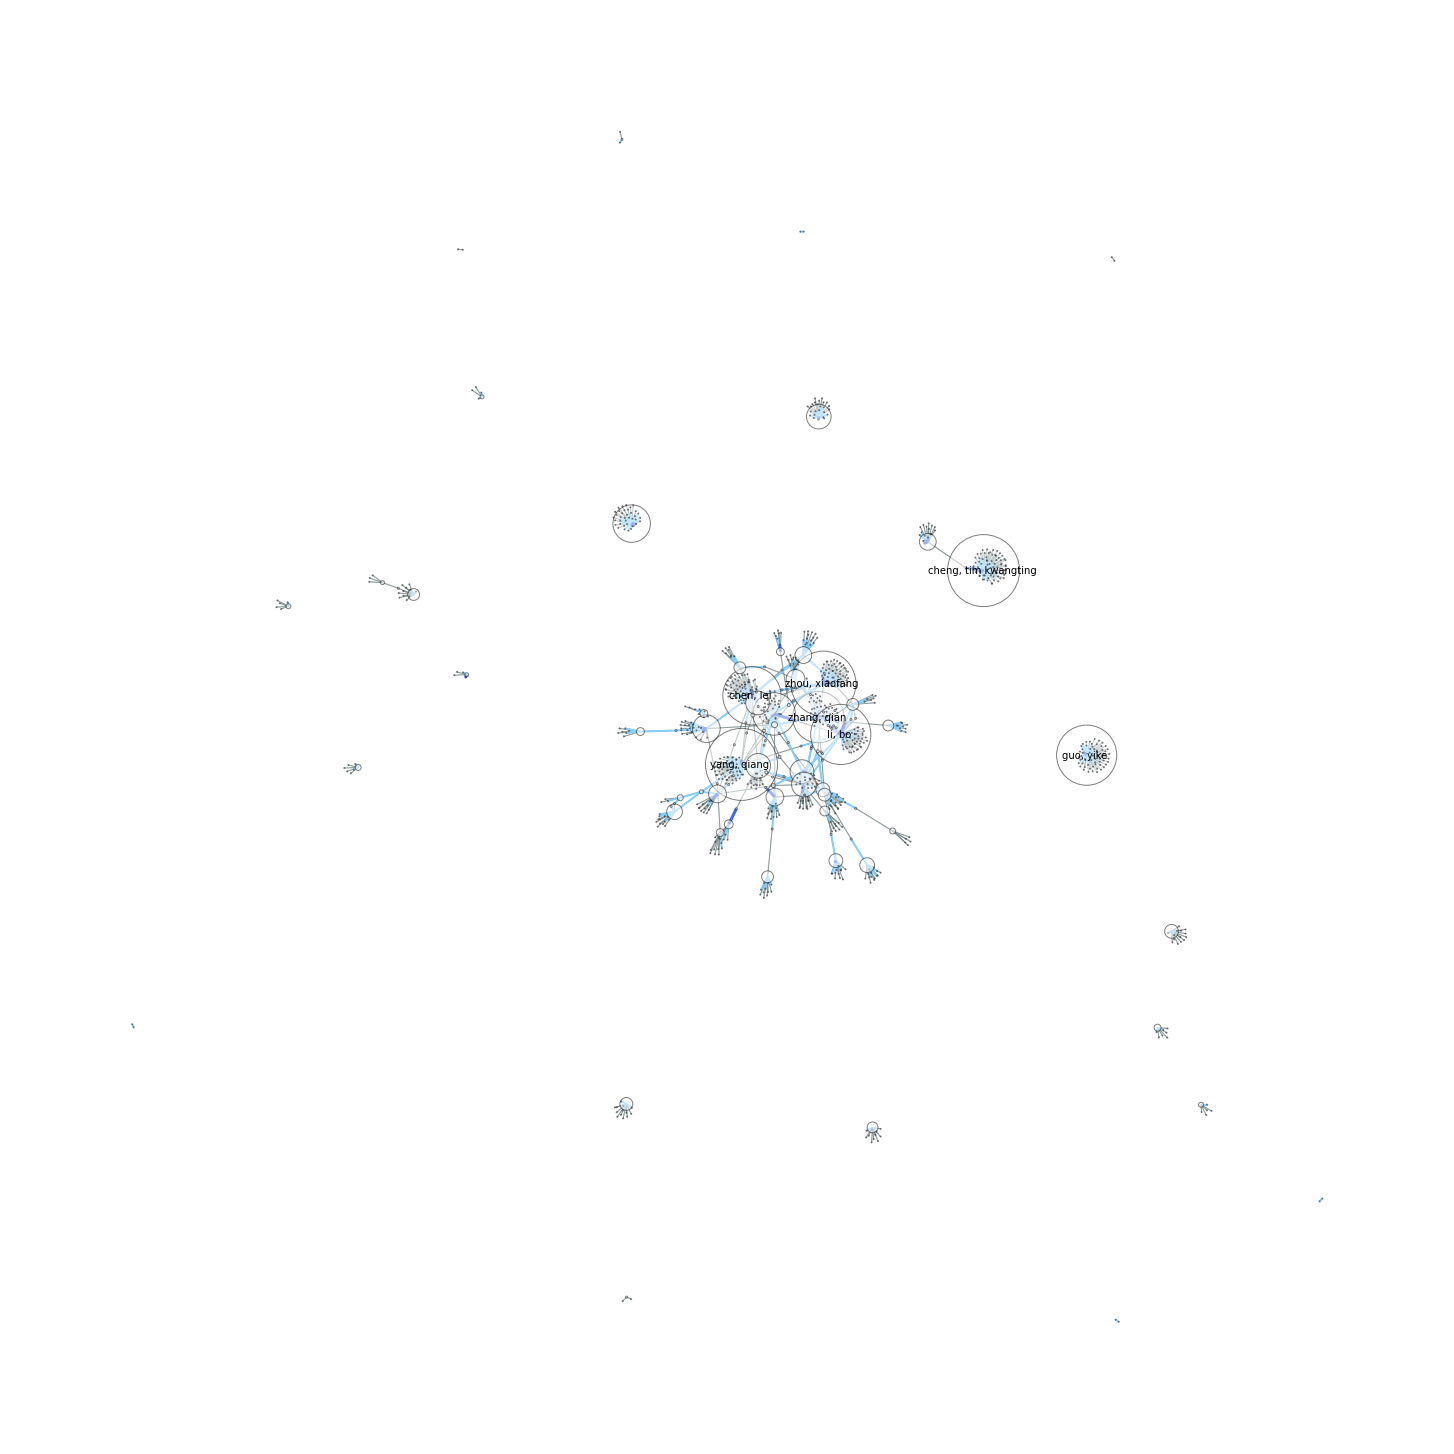

In [380]:

plt.figure(figsize=(20, 20))
draw_network(G, nx.degree_centrality(G), pos)

#edges
nx.draw_networkx_edges(G, pos=pos, edgelist=esmall, alpha=0.3, edge_color='powderblue')
nx.draw_networkx_edges(G, pos, edgelist=emiddle, width=2, alpha=1, edge_color="lightskyblue")
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=3, alpha=1, edge_color="royalblue")

#label
selected_nodes = [n for n in nx.degree_centrality(G) if nx.degree_centrality(G)[n] > 0.05 ]

label = {}
for n in G.nodes():
    if n in selected_nodes:
        label[n] = n

nx.draw_networkx_labels(G, pos, label, font_size=10, font_color="black")


8.2 nodes size proportionate to betweenness of centrality

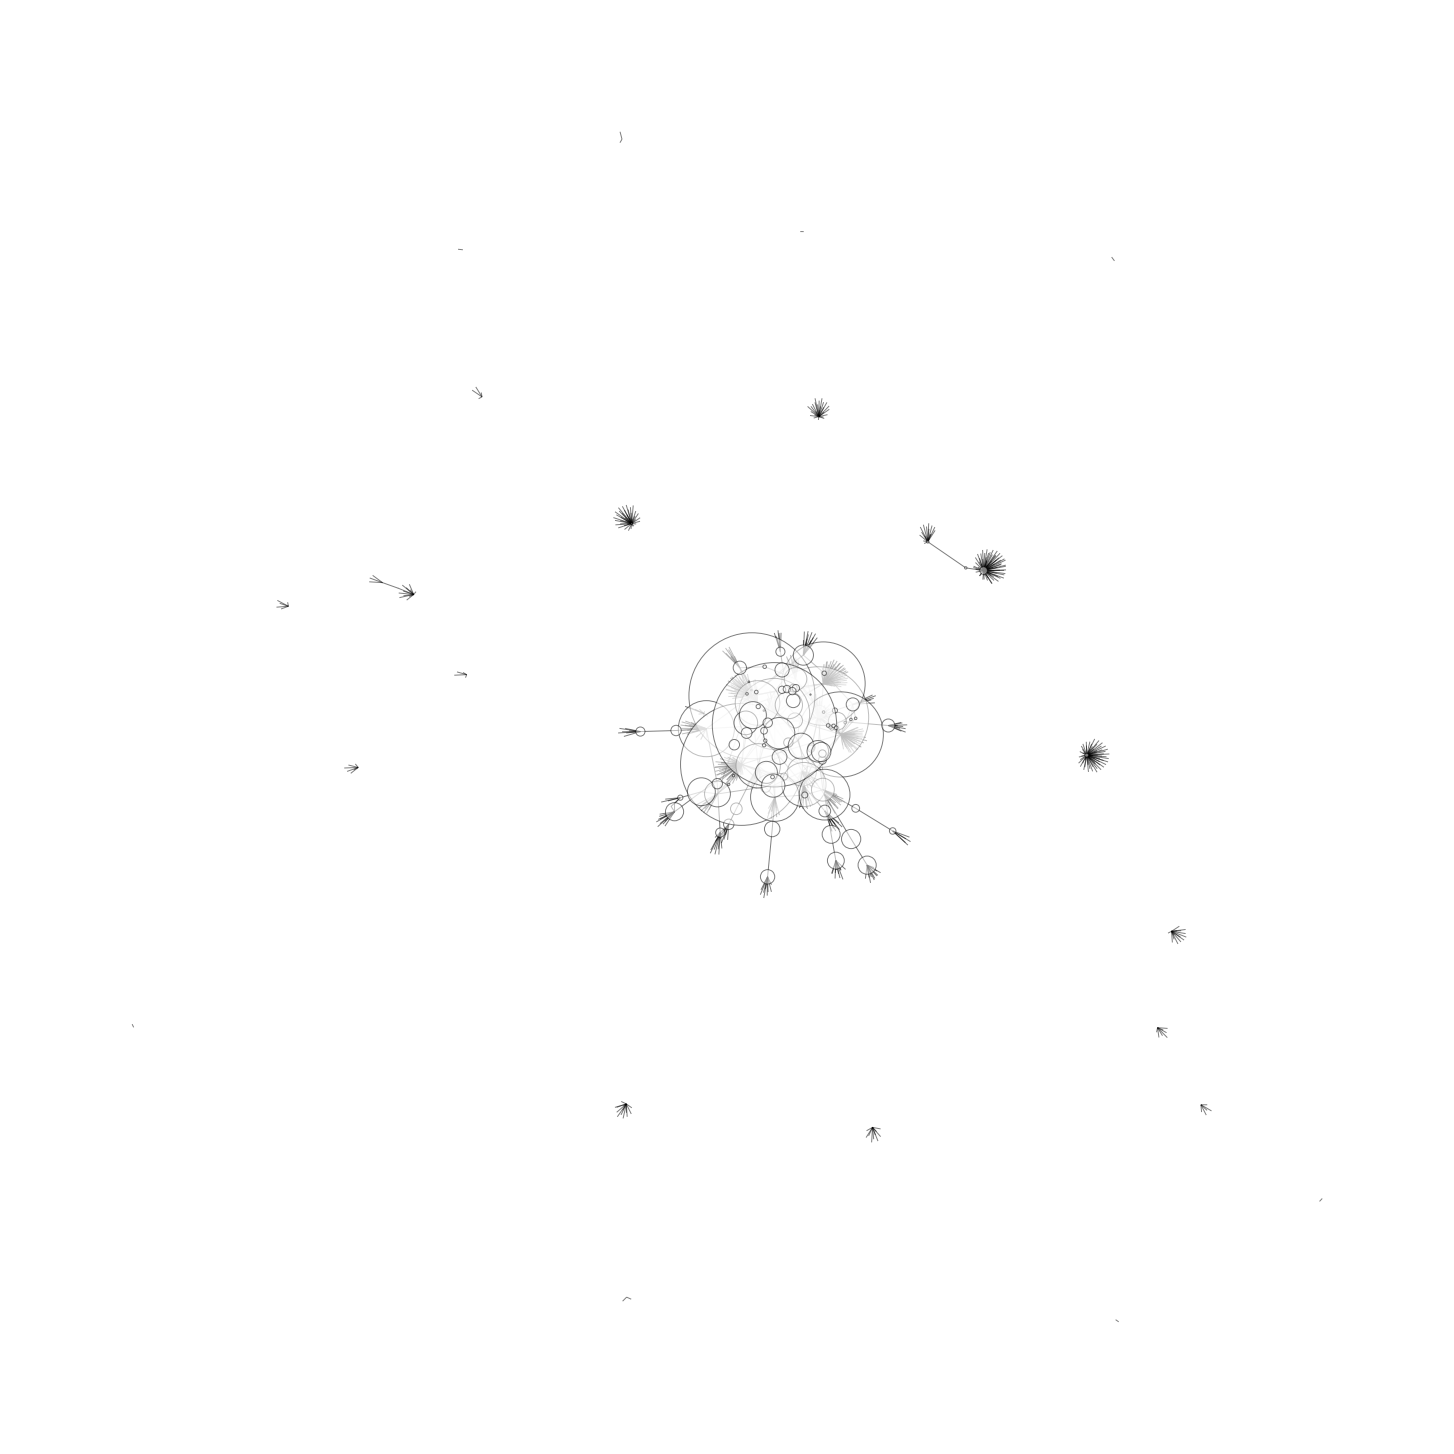

In [382]:
plt.figure(figsize=(20, 20))
draw_network(G, nx.betweenness_centrality(G), pos)

In [383]:
sorted(nx.betweenness_centrality(G), key=nx.betweenness_centrality(G).get, reverse=True)

['chen, lei ',
 'ni, lionel ming-shuan',
 'yang, qiang ',
 'zhang, qian ',
 'li, bo ',
 'zhou, xiaofang ',
 'qu, huamin ',
 'cheung, shing chi ',
 'yi, ke ',
 'kwok, james tin yau ',
 'luo, qiong ',
 'ma, xiaojuan ',
 'chen, kai ',
 'liu, yunhao',
 'song, yangqiu ',
 'jiang, di',
 'li, lei',
 'luo, qiong',
 'wong, raymond chi wing ',
 'li, bin',
 'yuan, mingxuan',
 'yang, qiang',
 'yeung, dit yan ',
 'chan, gary shueng han ',
 'wang, leye',
 'wang, hao',
 'bensaou, brahim ',
 'wang, lu',
 'tao, yufei',
 'papadias, dimitris ',
 'ng, wilfred siu hung ',
 'wu, bin',
 'wang, wei',
 'horner, andrew brian ',
 'yeung, dit yan',
 'wang, yong',
 'qu, huamin',
 'zhang, nevin lianwen ',
 'wang, min',
 'chen, wei',
 'zhu, wenwu',
 'sander, pedro ',
 'wang, wei ',
 'xu, dan ',
 'pong, ting chuen ',
 'hui, pan',
 'xie, xing',
 'yu, philip s.',
 'braud, tristan camille ',
 'wu, rongxin',
 'zhang, hongyu',
 'yao, quanming',
 'liu, ning',
 'liu, shixia',
 'tai, chiew lan ',
 'zhang, charles chuan ',
 '

8.3 nodes size proportionate to harmonic of centrality

In [385]:
def draw_network2(G, dict_centrality, pos):
    cc = dict_centrality
    if (max(cc.values()) < 1):
      #print(max(cc.values()))
      adapted_cc_values = [ v **2 * 10 for v in cc.values()]
    else:
        ## for harmonic centrality
        adapted_cc_values = [ v * 1 for v in cc.values()]
    nx.draw(G, nodelist=cc.keys(), node_size=adapted_cc_values, node_color="white", edgecolors='black', pos=pos, alpha=0.5)

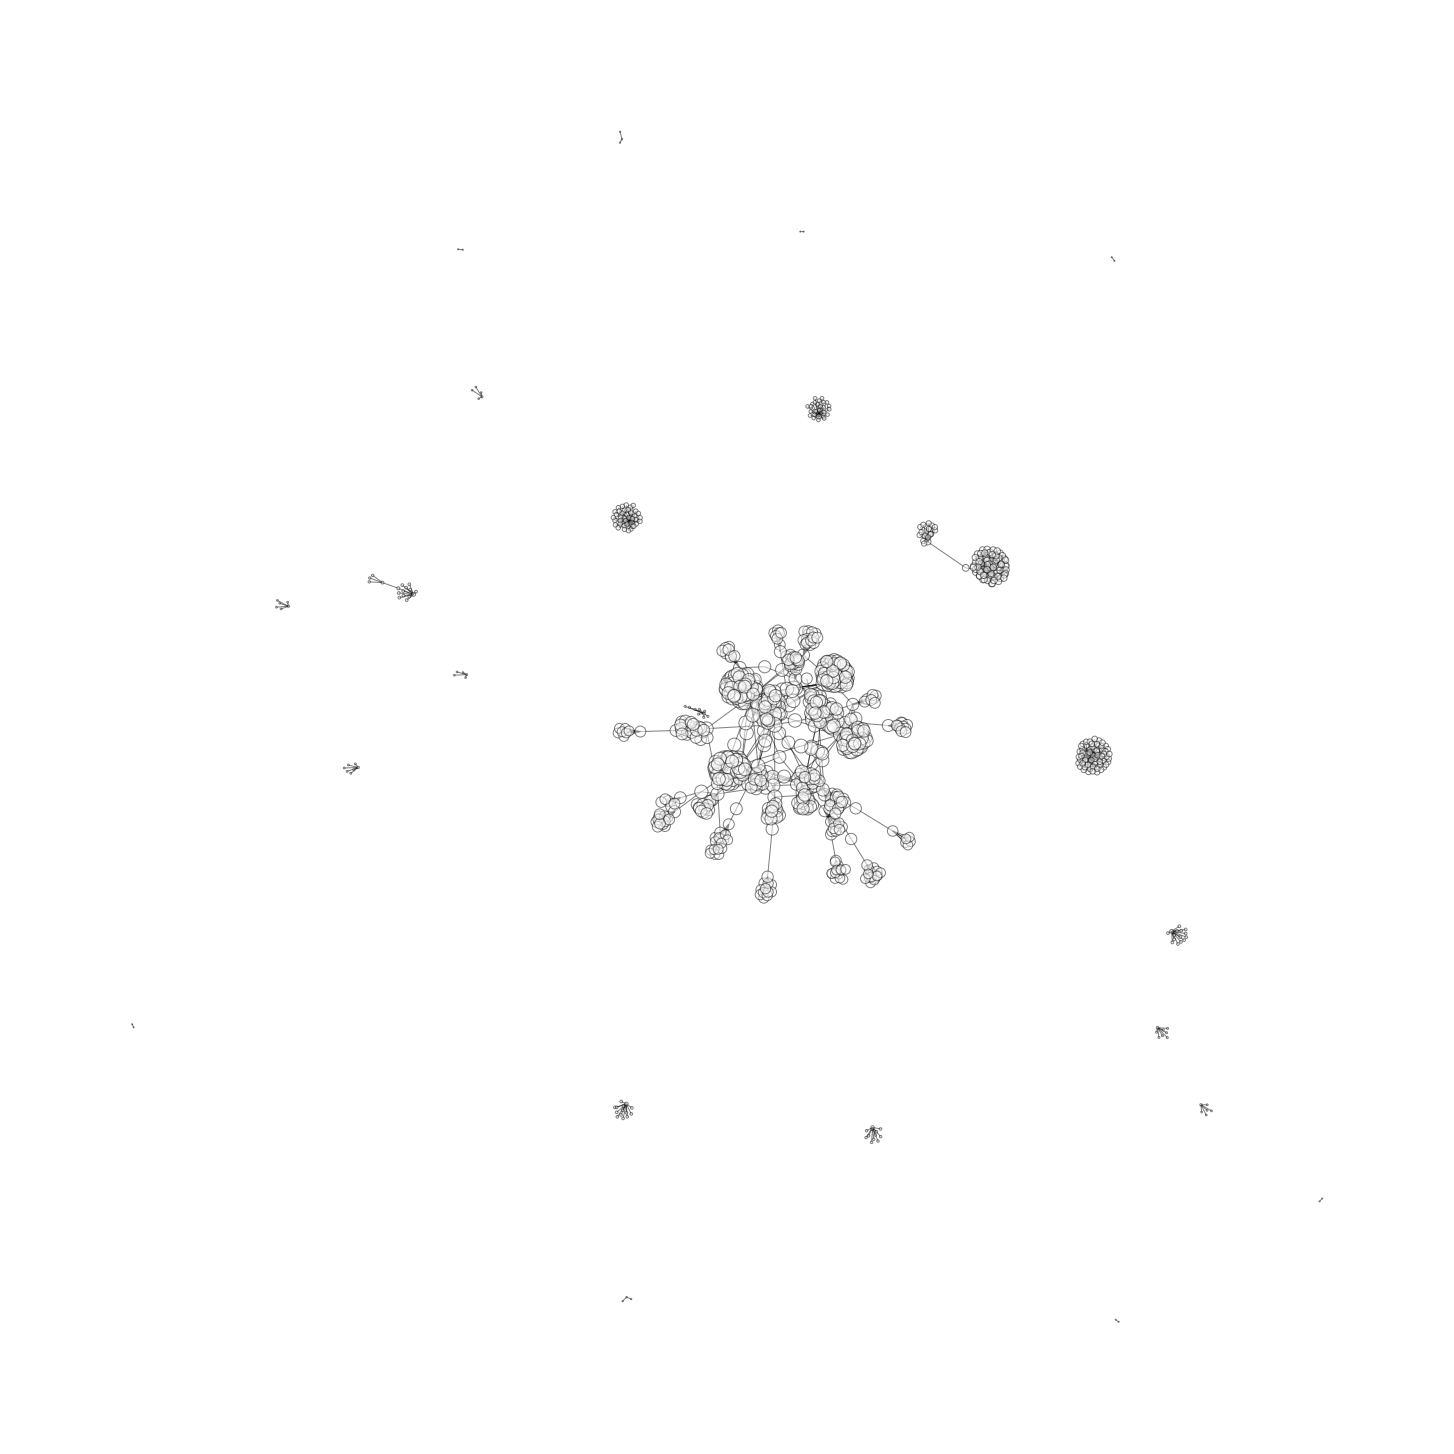

In [386]:
plt.figure(figsize=(20, 20))
draw_network2(G, nx.harmonic_centrality(G), pos)

In [387]:
sorted(nx.harmonic_centrality(G), key=nx.harmonic_centrality(G).get, reverse=True)

['yang, qiang ',
 'chen, lei ',
 'ni, lionel ming-shuan',
 'zhang, qian ',
 'zhou, xiaofang ',
 'qu, huamin ',
 'li, bo ',
 'luo, qiong ',
 'chen, kai ',
 'kwok, james tin yau ',
 'luo, qiong',
 'yuan, mingxuan',
 'li, bin',
 'wang, leye',
 'li, lei',
 'cheung, shing chi ',
 'ma, xiaojuan ',
 'zhang, yanchun',
 'zhou, xiangmin',
 'lin, xuemin',
 'cui, bin',
 'zhu, wenwu',
 'xie, xing',
 'yao, quanming',
 'chen, wei',
 'wang, yong',
 'liu, siyuan',
 'wang, wei',
 'yang, qiang',
 'wang, hao',
 'wu, haitao',
 'tan, kun',
 'liu, jiangchuan',
 'zhu, yanmin',
 'zhang, xinyan',
 'zhang, yaqin',
 'zhang, zhensheng',
 'jiang, di',
 'chai, di',
 'wang, yun',
 'yu, philip s.',
 'wong, raymond chi wing ',
 'liu, ning',
 'chen, lei',
 'chan, gary shueng han ',
 'wang, yue',
 'xu, qian',
 'song, yuanfeng',
 'li, quan',
 'xia, meng',
 'song, yangqiu ',
 'chen, li',
 'liu, yunhao',
 'wang, min',
 'zhang, yu',
 'ma, xiaojuan',
 'liu, shixia',
 'nau, dana',
 'huang, anbu',
 'pan, rong',
 'ma, weiying',


9. Degree Distribution:

In [388]:
degree = [d for n, d in G.degree()]
degree_dict = {}

for i in degree:
    if i in degree_dict:
        degree_dict[i] += 1
    else:
        degree_dict[i] = 1

print("Degree Distribution:")

for j in degree_dict:
    print(f"Degree {j}: {degree_dict[j]} nodes")


Degree Distribution:
Degree 3: 7 nodes
Degree 52: 1 nodes
Degree 1: 896 nodes
Degree 66: 1 nodes
Degree 17: 2 nodes
Degree 2: 60 nodes
Degree 73: 2 nodes
Degree 61: 2 nodes
Degree 9: 1 nodes
Degree 59: 1 nodes
Degree 38: 1 nodes
Degree 28: 1 nodes
Degree 25: 3 nodes
Degree 14: 3 nodes
Degree 8: 4 nodes
Degree 43: 1 nodes
Degree 18: 2 nodes
Degree 24: 2 nodes
Degree 4: 6 nodes
Degree 19: 1 nodes
Degree 11: 2 nodes
Degree 12: 4 nodes
Degree 13: 2 nodes
Degree 6: 4 nodes
Degree 16: 1 nodes
Degree 15: 1 nodes
Degree 10: 1 nodes
Degree 7: 1 nodes
Degree 5: 2 nodes


10. Link Prediction

In [389]:
!pip install linkpred
import linkpred
from linkpred.evaluation import Pair


[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [390]:
cn = linkpred.predictors.CommonNeighbours(G, excluded=G.edges()) 
cn_results = cn.predict()
print('Common Neighbours')
top = cn_results.top(5)
for edge, score in top.items():
    print(edge, score)

Common Neighbours
zhang, qian  - li, bo  7.0
zhou, xiaofang  - chen, lei  4.0
qu, huamin  - ma, xiaojuan  4.0
yang, qiang  - wong, raymond chi wing  3.0
wang, wei  - li, bo  3.0


In [391]:
jc = linkpred.predictors.Jaccard(G, excluded=G.edges())
jc_results = jc.predict()
print('Jaccard')
top = jc_results.top(5)
for edge, score in top.items():
    print(edge, score)

Jaccard
özsu, m. tamer - zou, lei 1.0
özsu, m. tamer - zhuang, y. 1.0
özsu, m. tamer - zhou, zimu 1.0
özsu, m. tamer - zhou, xiaofang 1.0
özsu, m. tamer - zheng, libin 1.0


In [392]:
gd = linkpred.predictors.GraphDistance(G, excluded=G.edges(), )
gd_results = gd.predict()
print('GraphDistance')
top = gd_results.top(5)
for edge, score in top.items():
    print(edge, score)

GraphDistance
zhu, wenwu - wang, wei 39.75903614457831
zhu, wenwu - zhang, jin 37.88819875776397
zheng, kai - shen, heng tao 33.77536231884058
zhu, wenwu - chen, yanjiao 32.88590604026846
zhang, jin - wang, wei 31.7007874015748


Network Analysis

In [393]:
print(nx.info(G))

Graph with 1015 nodes and 1044 edges


In [394]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.0020287404902789518


In [56]:
print(nx.is_connected(G))

False


In [408]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

In [409]:
#conponents
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
len(S)

24

In [410]:
diameter = []
for i in S:
    diameter.append(nx.diameter(i))
print(max(diameter))
#diameter

12


In [411]:
#most connective
from collections import Counter
degreeView = G.degree()

degree_counts = Counter(dict(degreeView ))
max_degree_node = degree_counts.most_common(1)
max_degree_node

[('cheng, tim kwangting ', 73)]

In [412]:
#most collaborative
edge_dict = dict()
for i in edge_list:
    name = i[0]
    if (not edge_dict) or (name not in edge_dict.keys()):
        edge_dict[name] = i[-1]
    else:
    #elif (name in edge_dict.keys()):
        edge_dict[name] = edge_dict[name] + i[-1]
print(edge_dict)

for j in edge_dict.keys():
    if (edge_dict[j] == max(edge_dict.values())):
        print(j, edge_dict[j])

{'lam, ngok': ['lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex'], 'dziong, zbigniew': ['lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex'], 'mason, lorne g.': ['lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex']}
lam, ngok ['lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex']
dziong, zbigniew ['lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex']
mason, lorne g. ['lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex', 'lam', 'alex']


In [397]:
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import kernighan_lin_bisection, modularity, label_propagation_communities, greedy_modularity_communities, partition_quality

In [413]:
#kernighan_lin_bisection: coverage, performance
partition_quality(G, kernighan_lin_bisection(G))

(0.9406130268199234, 0.5022803898135463)

In [415]:
#kernighan_lin_bisection: modularity
modularity(G, kernighan_lin_bisection(G))

0.43000146943886597

In [76]:
#greedy_modularity_communitie: coverage, performance
partition_quality(G, greedy_modularity_communities(G))

(0.9386973180076629, 0.9610516804150756)

In [78]:
#greedy_modularity_communitie: modularity
modularity(G, greedy_modularity_communities(G))

0.8726318895577522

In [80]:
len(list(greedy_modularity_communities(G)))

43

frozenset({'medioni, g.', 'tang, chi keung ', 'tai, yu-wing', 'tai, yu wing', 'tong, ws', 'lu, cewu', 'fan, qi', 'wu, tai pang', 'yeung, sai kit', 'ke, lei', 'wu, tai-pang', 'lu, yongyi', 'jia, jy', 'jia, jiaya', 'medioni, gerard'})


Text(0.5, 1.0, 'greedy_modularity_communities')

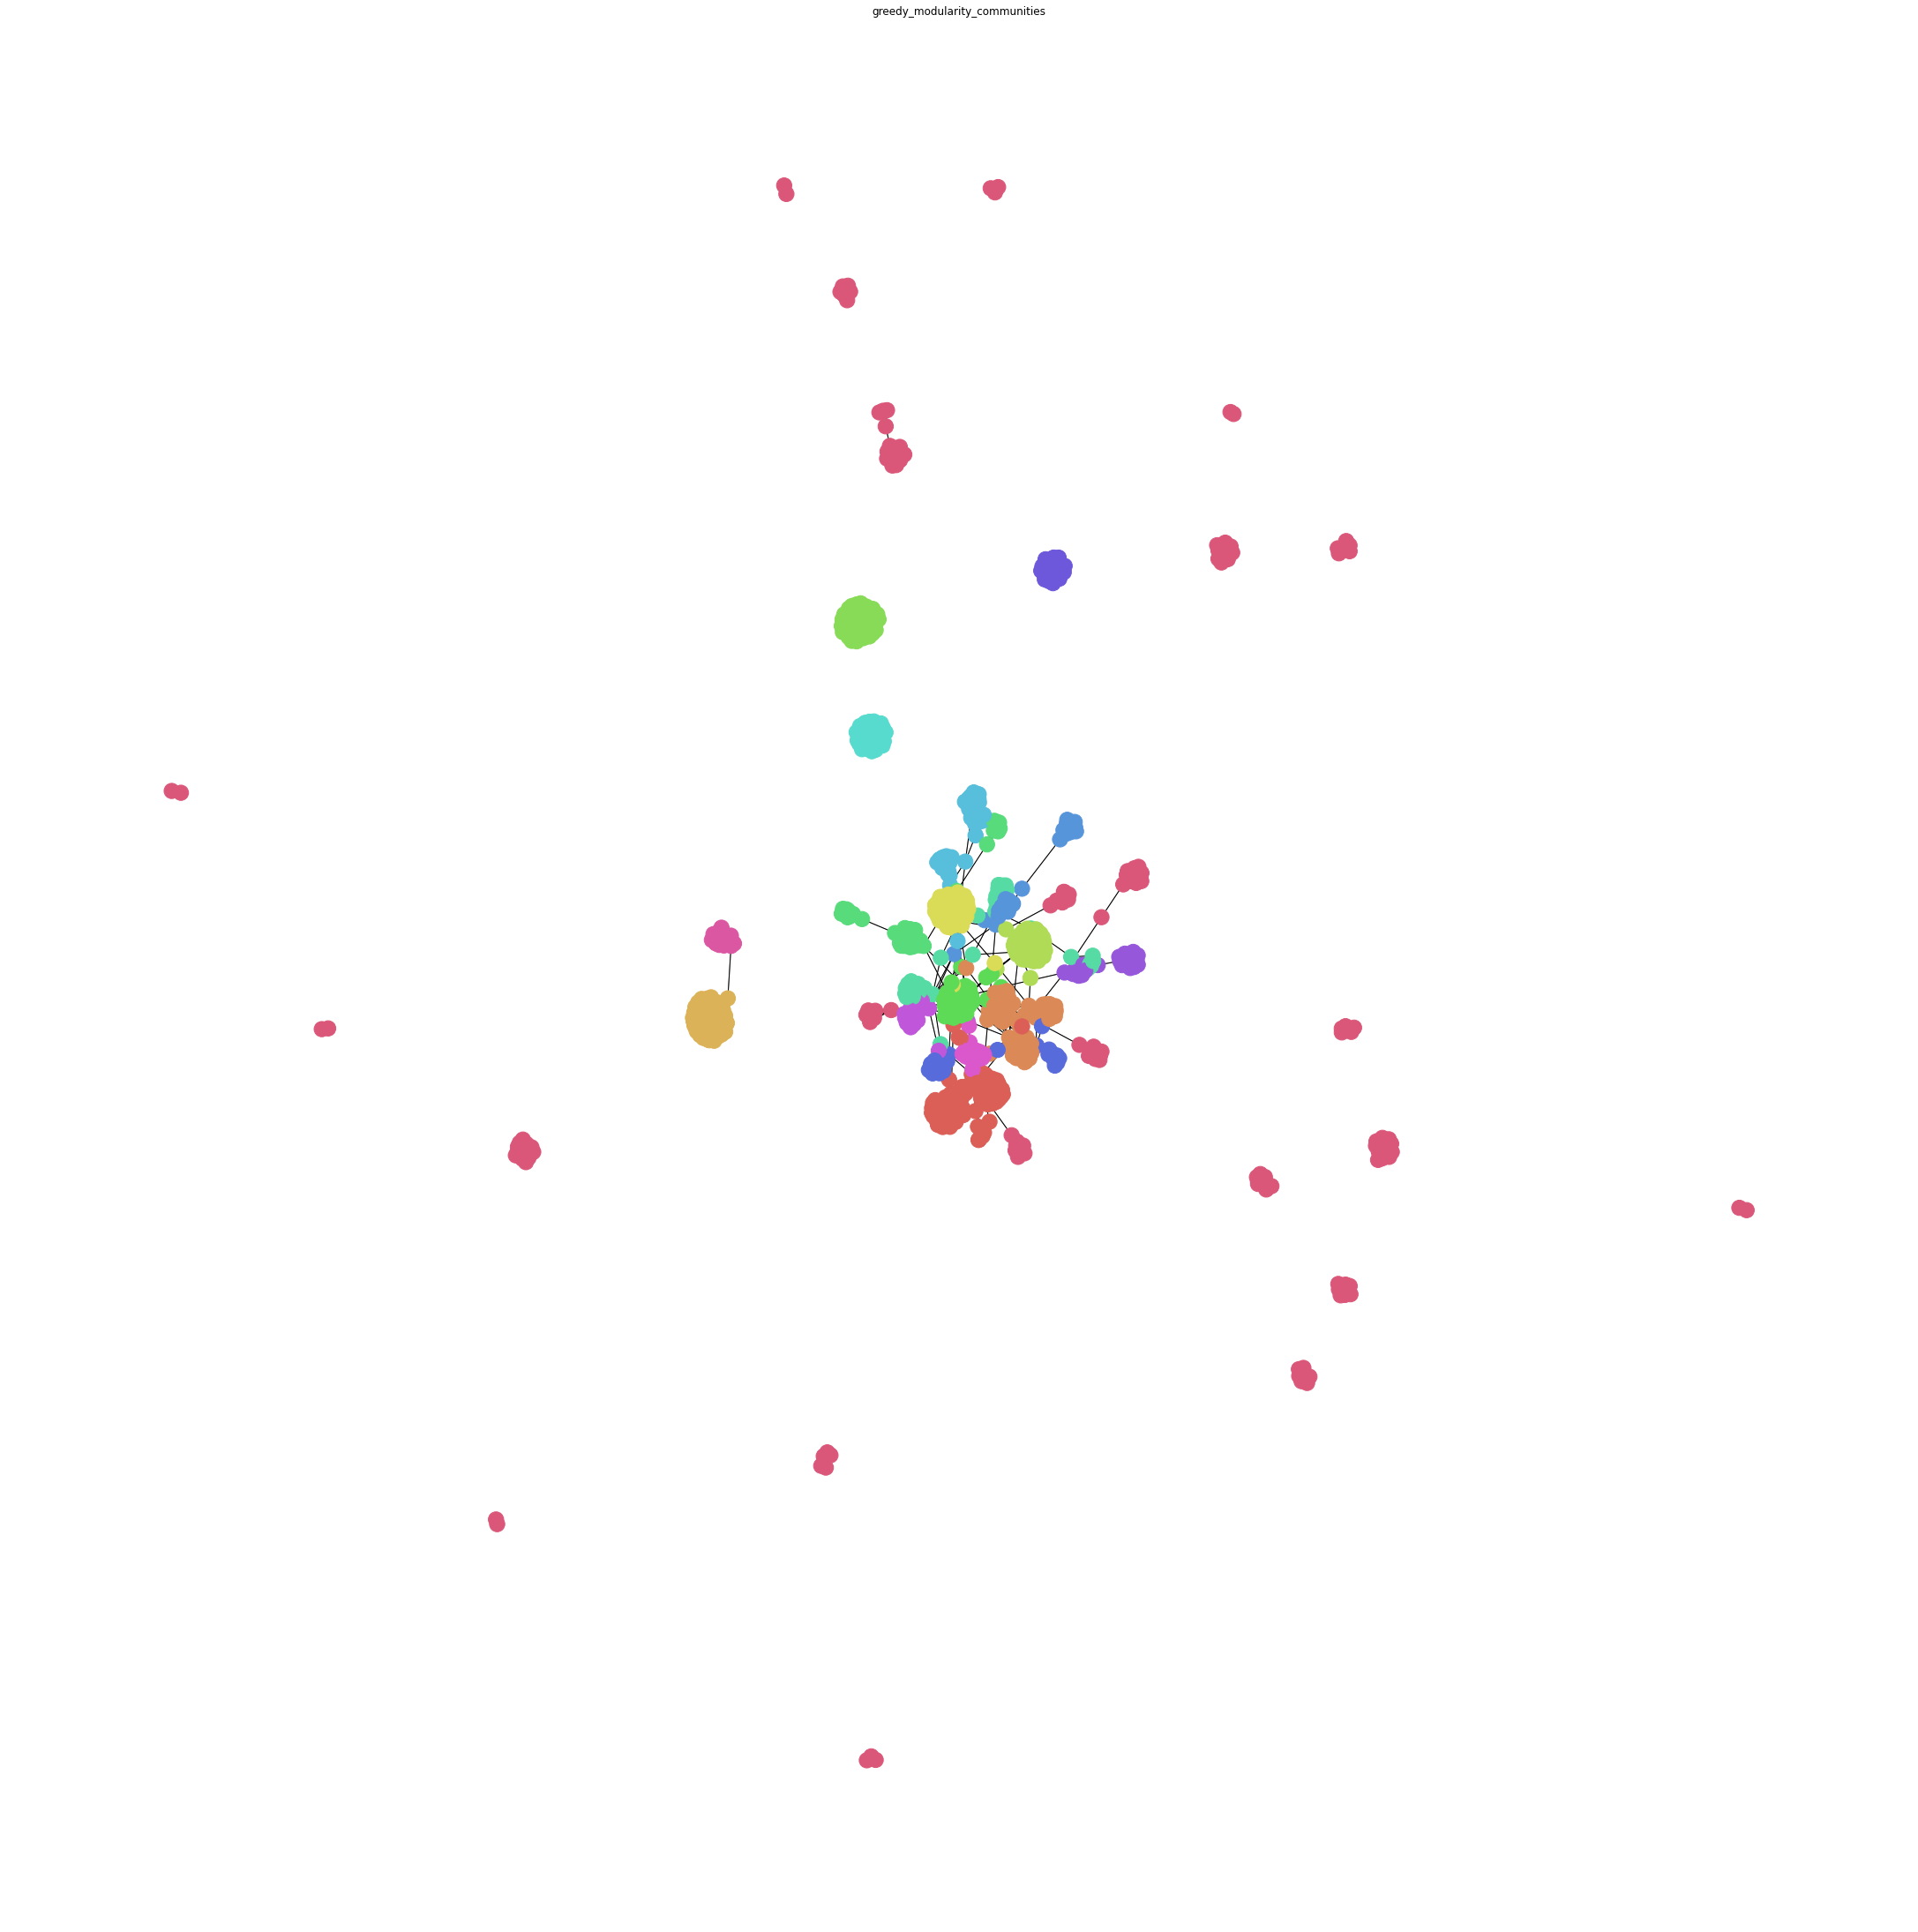

In [439]:
#communities: same colors that communities having less than 20 nodes
pos = nx.spring_layout(G)
node_groups = greedy_modularity_communities(G, weight='weight')
color_map = []
print(node_groups[20])
for node in G:
    for i in range(19):
        if i < 19:
            if node in node_groups[i]:
                #print(i)
                color_map.append(sns.color_palette("hls", 19)[i])
            else:
                pass
    for i in range(19, len(node_groups)):
        if node in node_groups[i]:
            color_map.append(sns.color_palette("hls", 19)[-1])

# plt.show()
plt.figure(figsize=(30,30))
nx.draw(G, node_color=color_map, pos=pos)
nx.draw_networkx_edges(G, pos, width=1, alpha=0.4)
plt.title('greedy_modularity_communities')

In [440]:
pos = nx.spring_layout(G) 

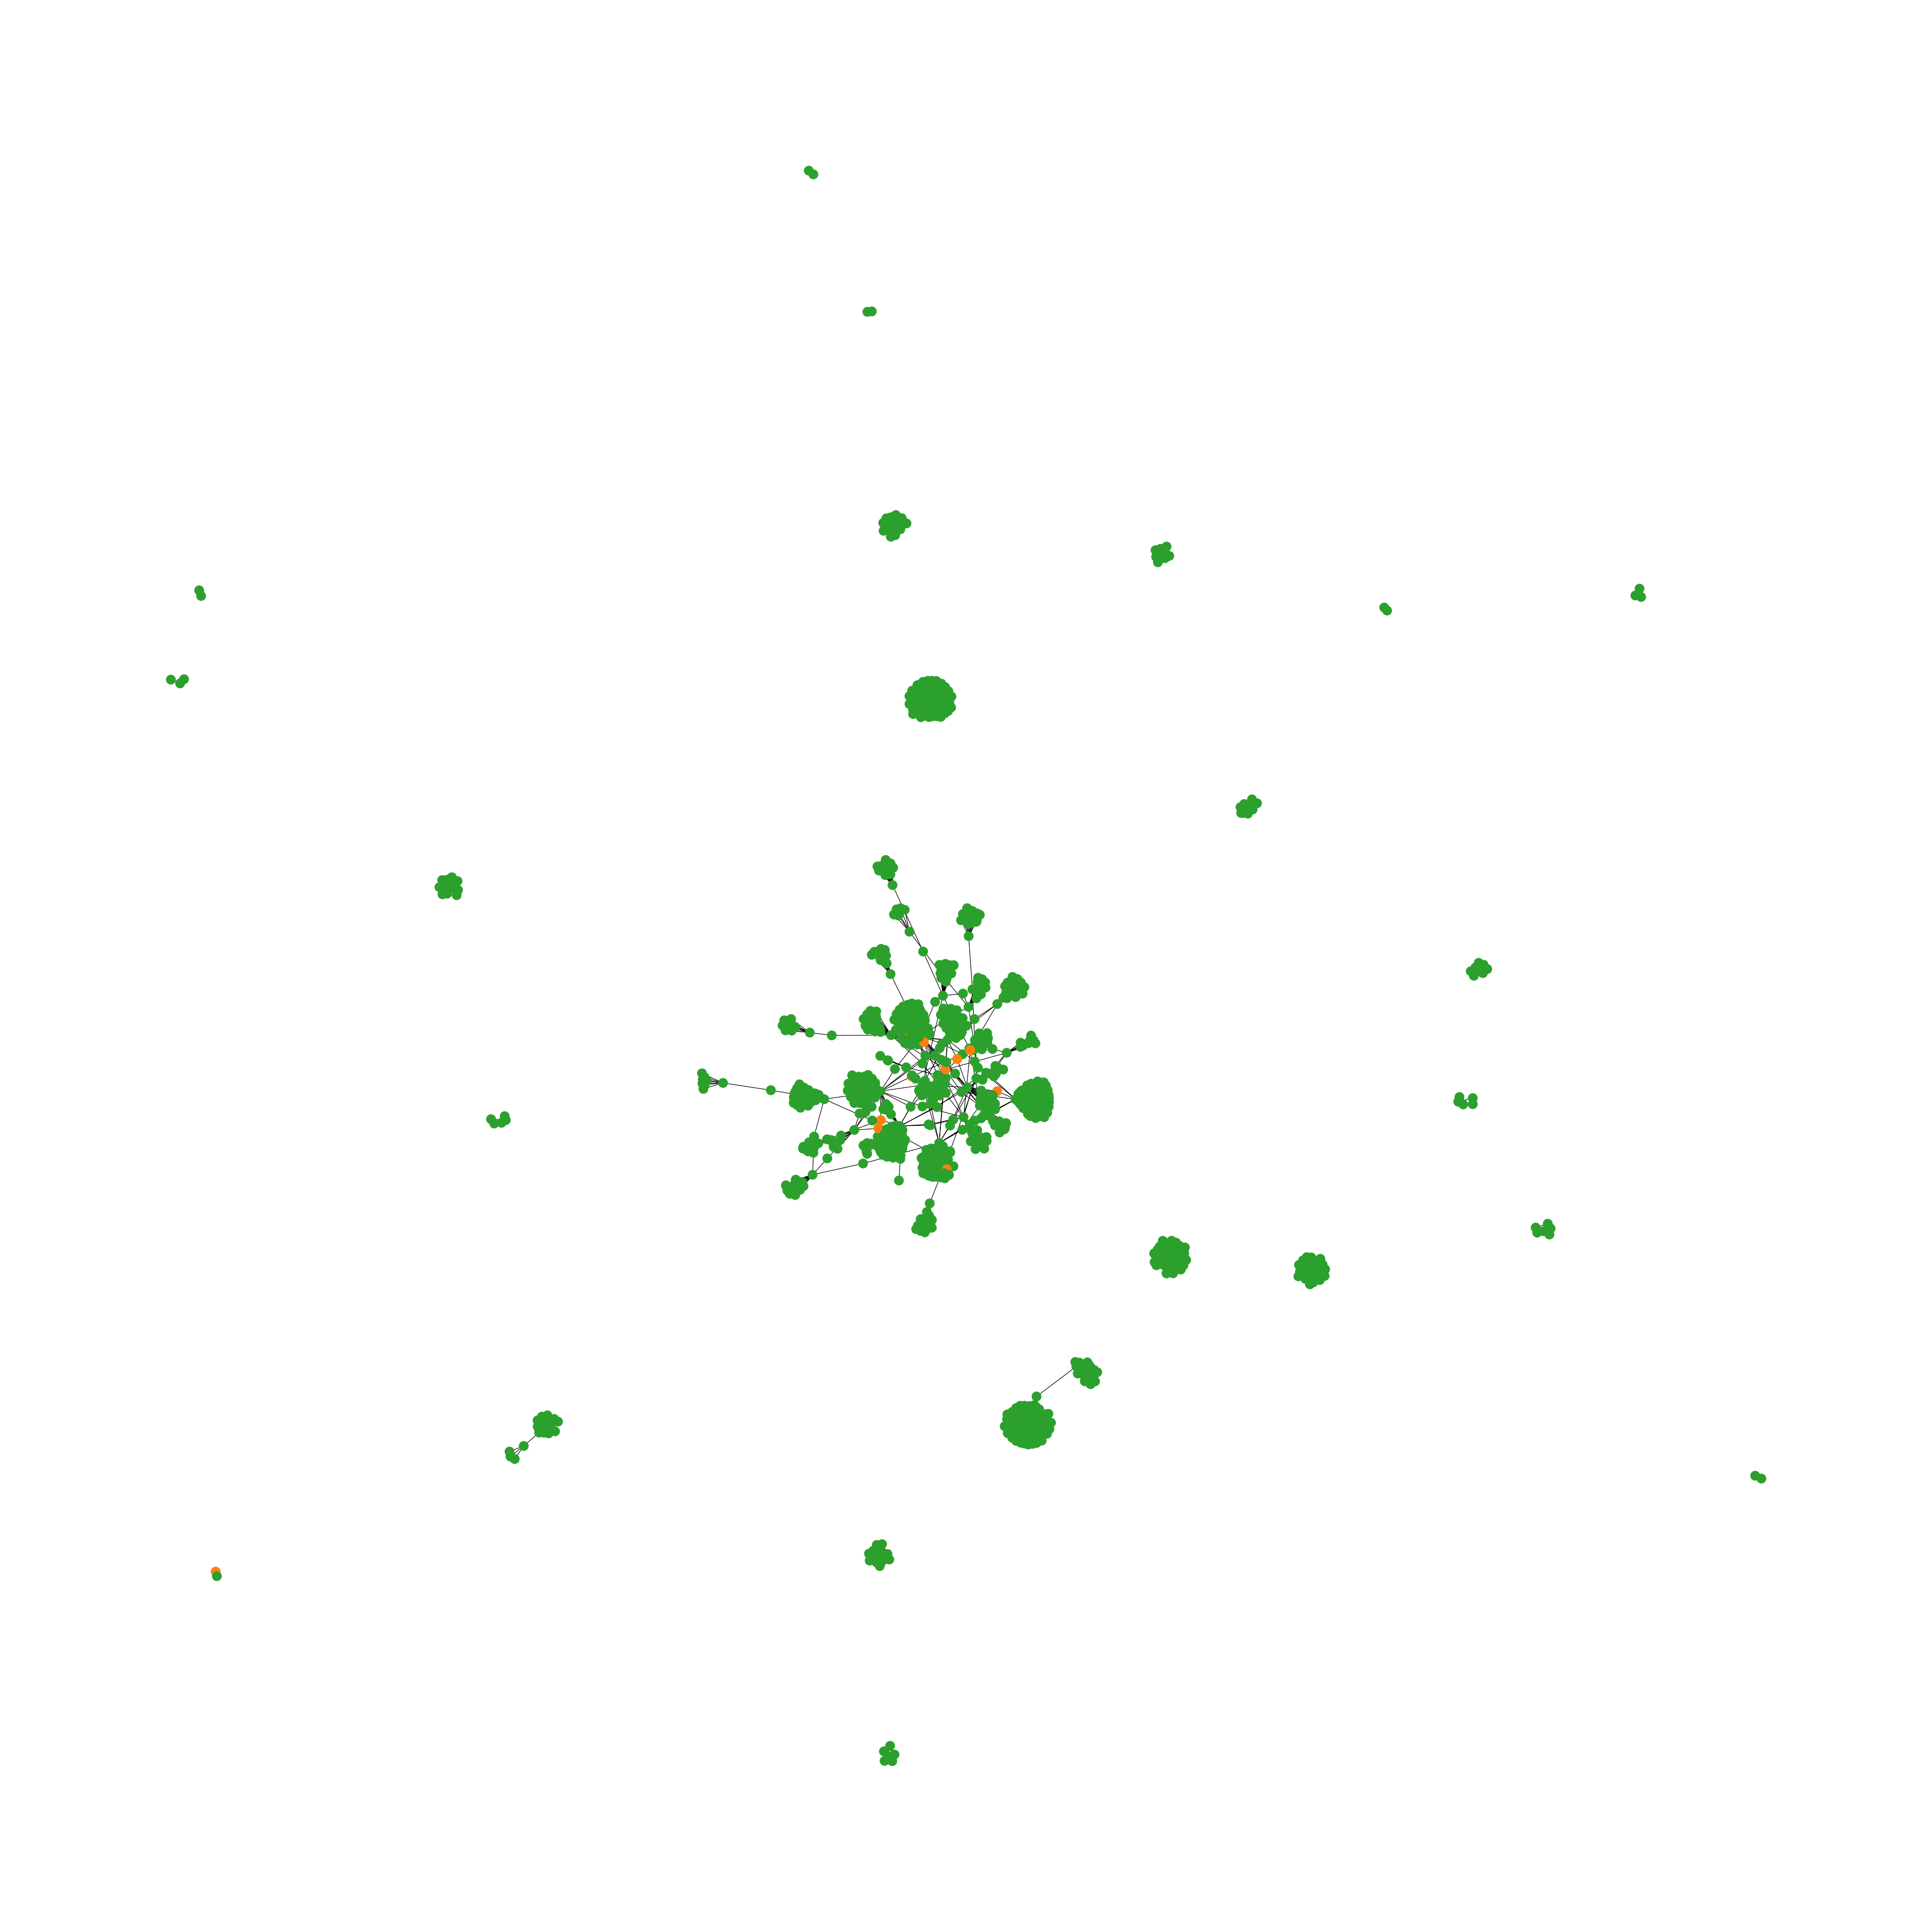

In [441]:
#find internals in graph
n_list = []
for j in range(len(scholar_list)):
    for k in  range(len(scholar_list[j][0])):
            if k == 0:
                word = scholar_list[j][0][k] + ", "
            else:
                word += scholar_list[j][0][k]
    n_list.append(word)

pos = nx.spring_layout(G)  
internal = []
external = []
color_map_1 = []
count = 0
node_groups = greedy_modularity_communities(G)
for node in G:
    for i in range(len(node_groups)):
        if (node in node_groups[i]) and (node in n_list):
            internal.append(node)
        elif (node not in node_groups[i]) and (node not in n_list) and (i < 5):
            external.append(node)
overall = [internal, external]

for node in G:
    if node in overall[0]:
        color_map_1.append(sns.color_palette()[1])
    else:
        color_map_1.append(sns.color_palette()[2])
 # plt.show()
plt.figure(figsize=(50,50))
nx.draw(G, node_color=color_map_1, pos=pos)
nx.draw_networkx_edges(G, pos, width=1, alpha=0.4)
#plt.title('greedy_modularity_communities') 

In [428]:
node_groups = greedy_modularity_communities(G)
#big5_node_gp = greedy_modularity_communities(G)[:5]
com = []
for node in n_list:
    for i in range(len(node_groups)):
        if (node in node_groups[i]):
            com.append(i)
com = list(set(com))
com

[1, 4, 6, 7, 39, 10, 13, 18, 25]

In [429]:
node_groups = greedy_modularity_communities(G)
big18_node_gp = greedy_modularity_communities(G)[:18]
com = []
for node in n_list:
    for i in range(len(big18_node_gp)):
        if (node in big18_node_gp[i]):
            com.append(i)
com = list(set(com))
com

[1, 4, 6, 7, 10, 13]

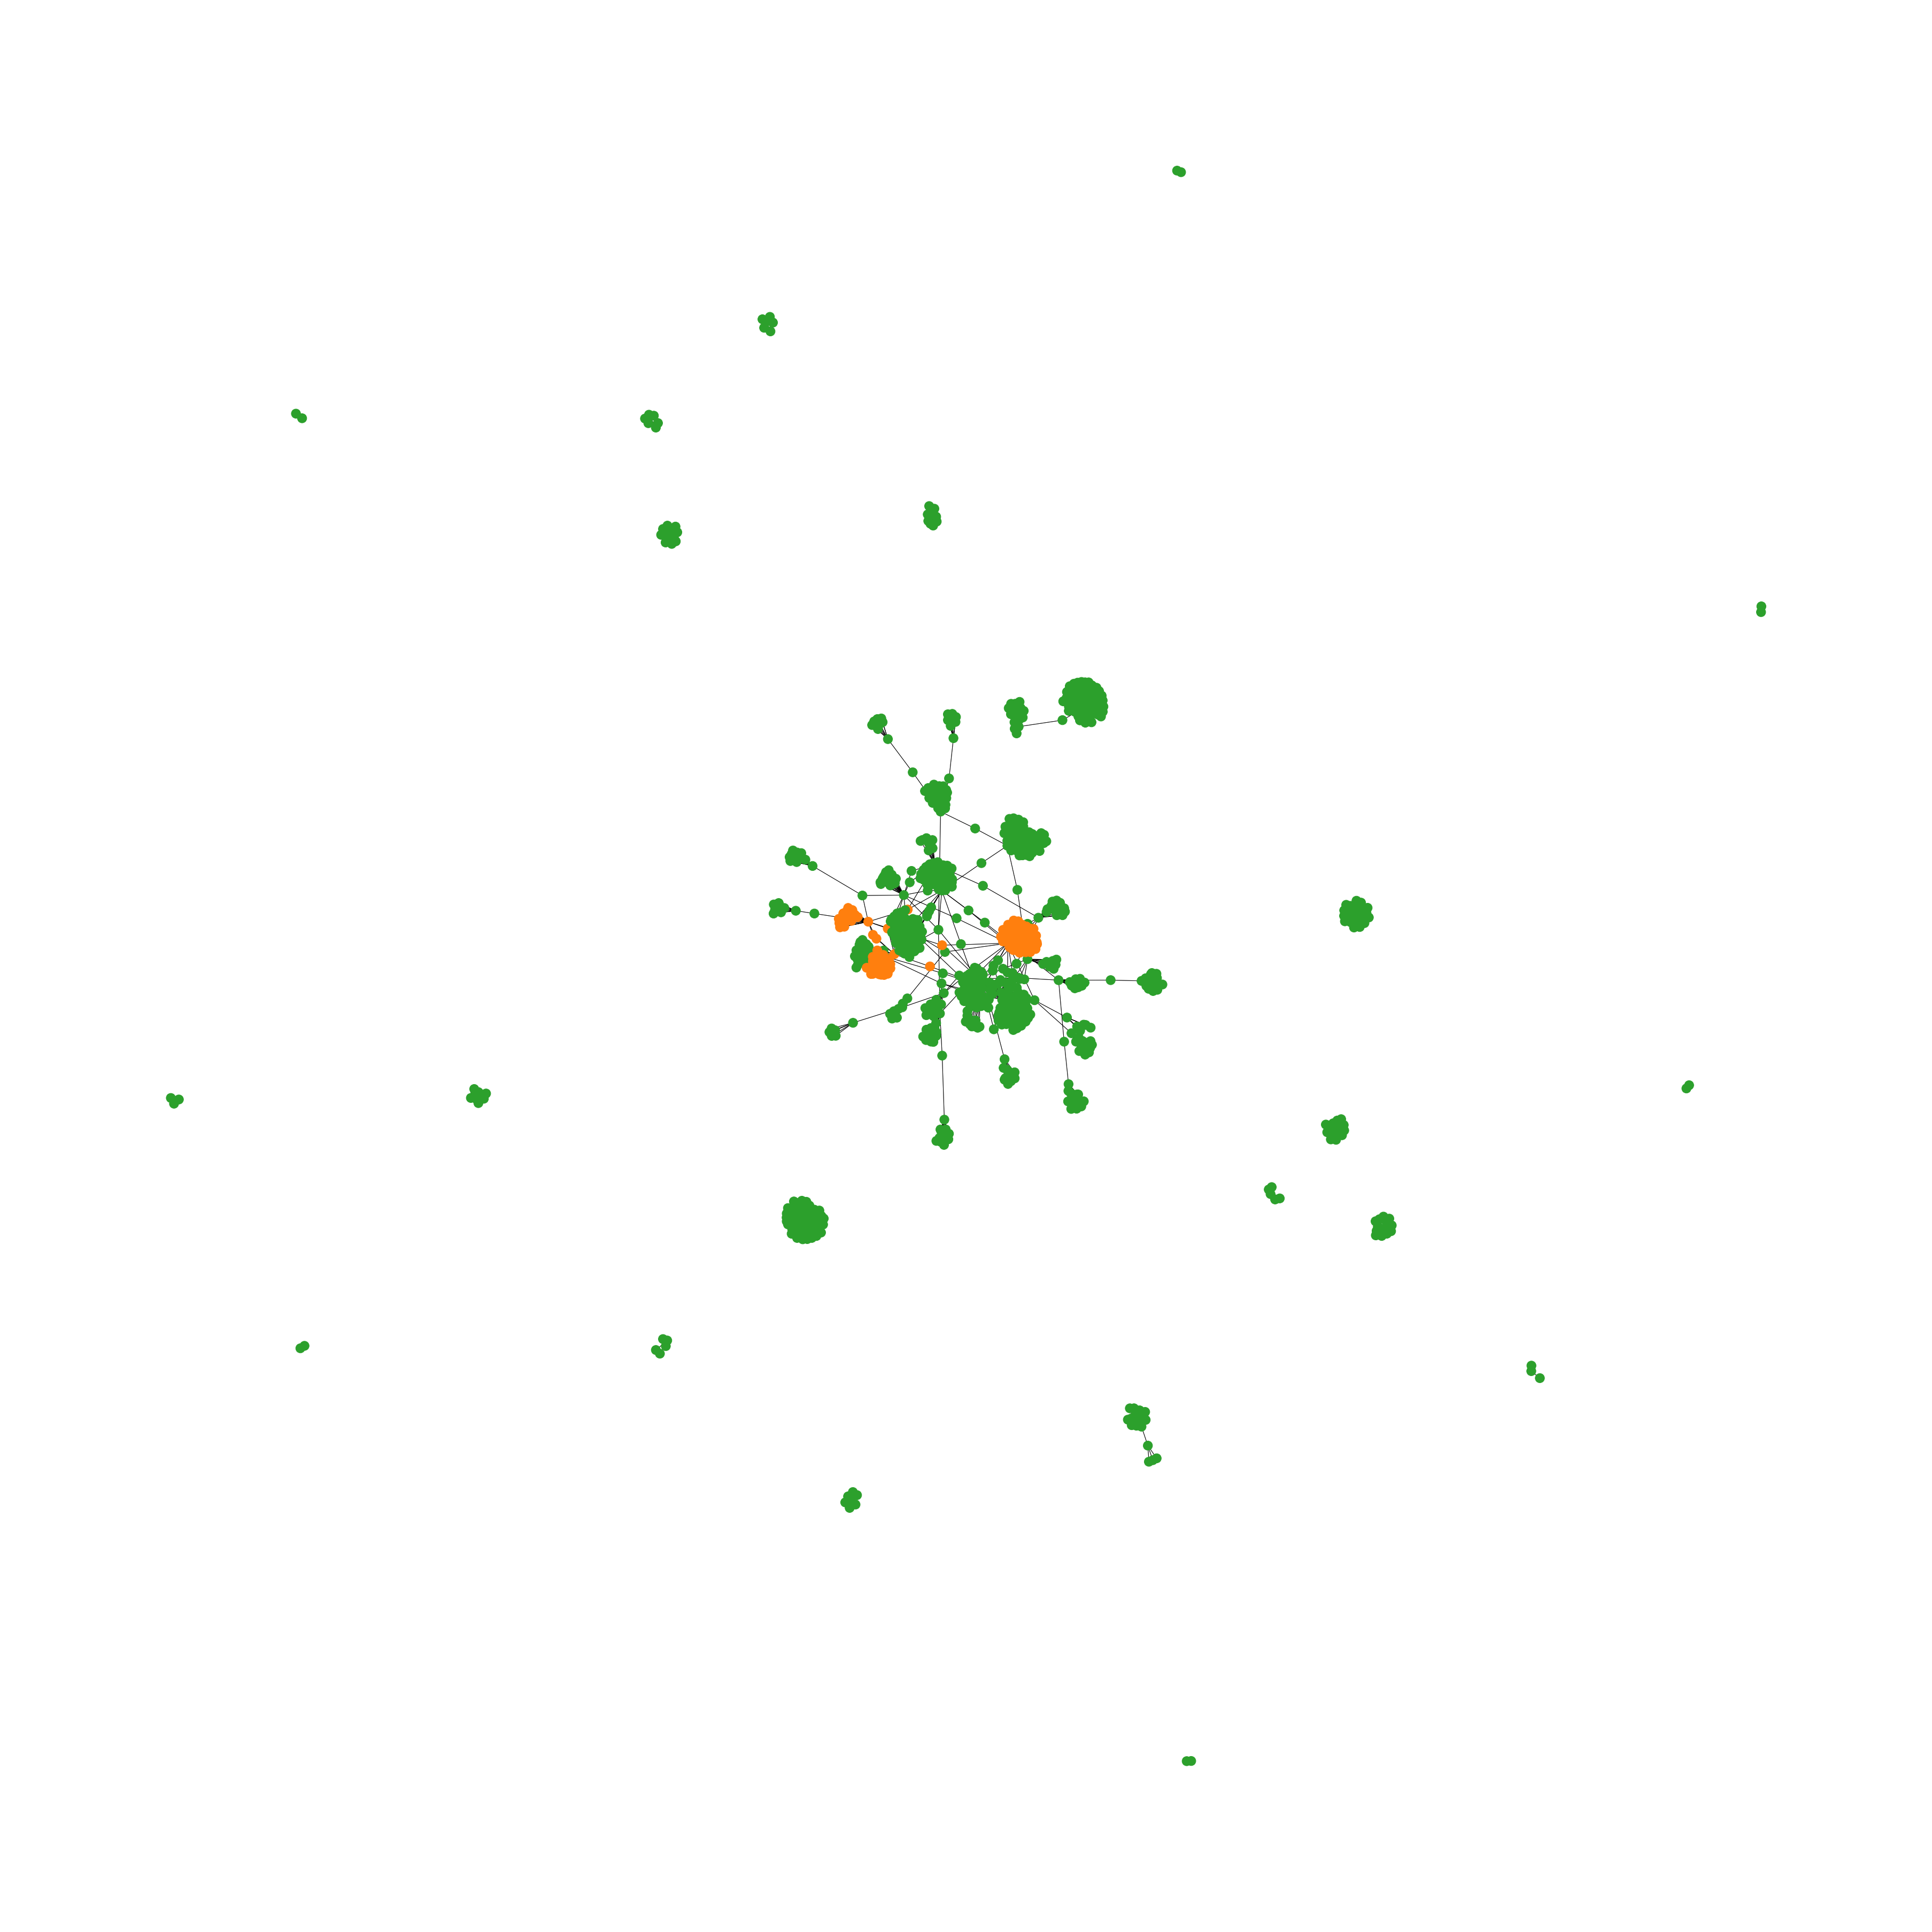

In [431]:
#communities having internals in top 5 largest communities
node_groups = greedy_modularity_communities(G)
big5_node_gp = greedy_modularity_communities(G)[:5]
color_map_2 = []
com = []
for node in n_list:
    for i in range(len(big5_node_gp)):
        if (node in big5_node_gp[i]):
            #print(node)
            com.append(i)
com = list(set(com))

for node in G:
    #for i in range(len(com)):
        #ind = com[i]
        if (node in node_groups[1]) or (node in node_groups[4]):
            color_map_2.append(sns.color_palette()[1])
        else:
            color_map_2.append(sns.color_palette()[2])
 # plt.show()
plt.figure(figsize=(50,50))
nx.draw(G, node_color=color_map_2, pos=pos)
nx.draw_networkx_edges(G, pos, width=1, alpha=0.4)
#plt.title('greedy_modularity_communities')      


In [435]:
communities = sorted(greedy_modularity_communities(G, weight='weight'), key=len, reverse=True)

ValueError: num must be 1 <= num <= 4, not 5

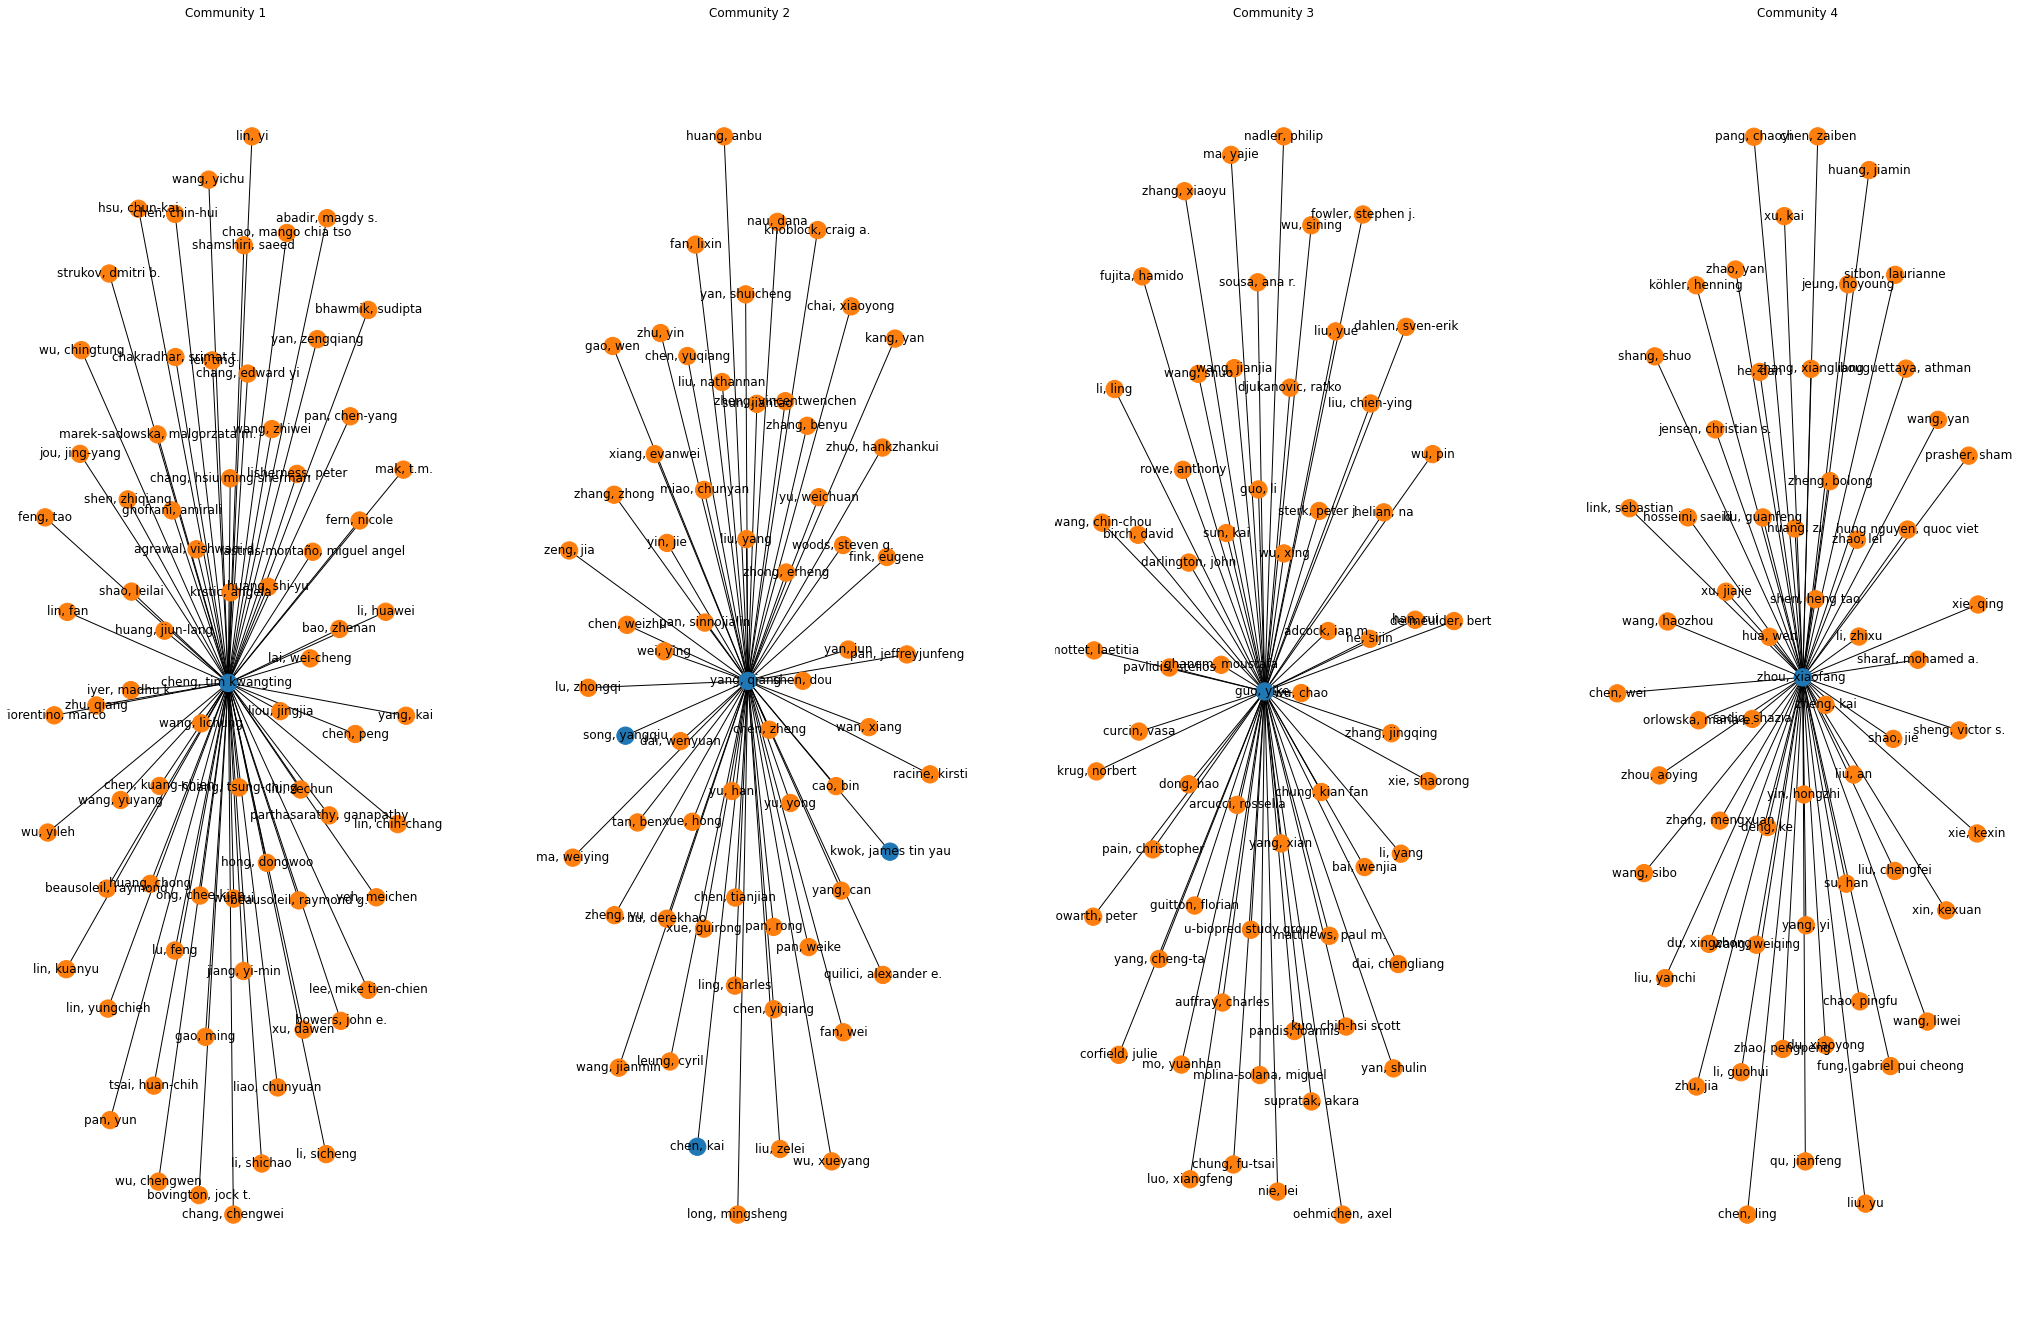

In [436]:

'''Add community to node attributes'''
for c, v_c in enumerate(node_groups):
    for v in v_c:
        # Add 1 to save 0 for external edges
        G.nodes[v]['community'] = c + 1
        
'''Find internal edges and add their community to their attributes'''
for v, w, in G.edges:
    if G.nodes[v]['community'] == G.nodes[w]['community']:
        # Internal edge, mark with community
        G.edges[v, w]['community'] = G.nodes[v]['community']
    else:
        # External edge, mark as 0
        G.edges[v, w]['community'] = 0

N_coms=len(communities)
edges_coms=[]#edge list for each community
coms_G=[nx.Graph() for _ in range(N_coms)] #community graphs

fig=plt.figure(figsize=(36,24))

for i in range(len(n_list)):
    n_list[i] = n_list[i].replace(' ', '')

for i in range(N_coms):
    colors=[]
    edges_coms.append([(u,v,d) for u,v,d in G.edges(data=True) if d['community'] == i+1])#identify edges of interest using the edge attribute
    coms_G[i].add_edges_from(edges_coms[i]) #add edges
    
    for node in coms_G[i]:
        comp = node.replace(' ', '')
        #print(comp)
        if comp in n_list:
            #print(node)
            colors.append(sns.color_palette()[0])
        else:
            #print(node)
            colors.append(sns.color_palette()[1])
            
    plt.subplot(1,4,i+1)#plot communities
    plt.title('Community '+str(i+1))
    pos = nx.spring_layout(coms_G[i])
    nx.draw(coms_G[i],pos=pos,with_labels=True,node_color=colors) 

In [365]:
nx.diameter(coms_G[0])

2

In [366]:
nx.diameter(coms_G[1])

2

In [367]:
nx.diameter(coms_G[2])

2

In [372]:
nx.diameter(coms_G[3])

2